# Multivariate Analysis of Variance (MANOVA)

MANOVA extends the ANOVA framework to multiple dependent variables, allowing for the assessment of the effect of independent variables on multiple outcomes simultaneously. This method is particularly useful for understanding complex interactions and effects in multidimensional data.

#### Business Scenario

In this analysis, we explore how different manufacturing shifts (morning, afternoon, night) impact key quality metrics of semiconductor products. The goal is to uncover whether shift timing is associated with variations in product quality, potentially due to differences in operating conditions or workforce performance.

#### Objective

The objective is to determine if semiconductor products produced during different production periods exhibit significant differences in their quality metrics. This could reveal the influence of factors such as raw materials, machinery conditions, or operational staff on product quality.

#### Data Description

The dataset comprises 300 observations representing different production batches. Four key quality metrics are tracked:
- Defect Rate (%)
- Production Yield (%)
- Equipment Efficiency (%)
- Product Reliability Score (1-10)

Each batch is associated with one of three shifts: morning, afternoon, or night.

#### Statistical Formula

The MANOVA test uses the following formula to assess the differences across multiple dependent variables simultaneously:

$$
\Lambda = \frac{|E|}{|H+E|}
$$

where:
- $\Lambda$ is Wilks' Lambda,
- $|E|$ is the determinant of the error (within-group) covariance matrix,
- $|H+E|$ is the determinant of the combined (hypothesis plus error) covariance matrix.

#### Python Code for MANOVA

In [4]:
import pandas as pd
import numpy as np
from statsmodels.multivariate.manova import MANOVA

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
data = {
    'defect_rate': np.random.uniform(0.5, 2.0, 300),
    'production_yield': np.random.uniform(95, 100, 300),
    'equipment_efficiency': np.random.uniform(80, 100, 300),
    'product_reliability_score': np.random.randint(1, 11, 300),
    'shift': np.random.choice(['Morning', 'Afternoon', 'Night'], 300)
}

df = pd.DataFrame(data)

# Preparing data for MANOVA
manova_data = df.pivot(columns='shift', values=['defect_rate', 'production_yield', 'equipment_efficiency', 'product_reliability_score'])

# Conducting MANOVA
maov = MANOVA.from_formula('defect_rate + production_yield + equipment_efficiency + product_reliability_score ~ shift', data=df)
print(maov.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0006 4.0000 294.0000 115843.8648 0.0000
         Pillai's trace    0.9994 4.0000 294.0000 115843.8648 0.0000
 Hotelling-Lawley trace 1576.1070 4.0000 294.0000 115843.8648 0.0000
    Roy's greatest root 1576.1070 4.0000 294.0000 115843.8648 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
            shift           Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wilks' lambda  0.9836  8.0000  588.0000 

#### Interpretation  
The results from a MANOVA (Multivariate Analysis of Variance) analysis, which tests for differences in multiple outcome variables across groups. In your case, the groups are defined by the manufacturing shifts ('shift'). The output includes several statistics: Wilks' lambda, Pillai's trace, Hotelling-Lawley trace, and Roy's greatest root. Each of these provides a different method for testing the hypothesis that the mean vectors of the dependent variables are the same across groups.

**Interpretation of the Results:**

**Intercept Tests:** These tests are checking the overall model excluding the effect of shifts. The extremely low p-value (< 0.0001 for all tests) indicates that the model, including all predictors other than 'shift', significantly predicts the outcome variables. This suggests that the variables in your model are collectively significant in explaining variation in the outcome measures.

**Shift Tests:** These are the key results for your business scenario, assessing whether different manufacturing shifts (morning, afternoon, night) have a statistically significant impact on the quality metrics of semiconductor products (as represented by your outcome variables).

- **Wilks' Lambda:** A value of 0.9836 with a p-value of 0.7698 indicates that there is no significant difference in the combined dependent variables between different shifts. Wilks' lambda is a measure of how much the group means deviate from the overall mean, and in this case, the high p-value suggests little to no deviation.

- **Pillai's Trace:** Similar to Wilks' lambda, a Pillai's trace value of 0.0165 and a p-value of 0.7683 also suggest no significant effect of shift on the outcome variables.

- **Hotelling-Lawley Trace:** Again, a value of 0.0166 with a p-value of 0.7704 supports the finding that shifts do not significantly affect the outcome variables.

- **Roy's Greatest Root:** This statistic also indicates no significant difference between groups with a value of 0.0112 and a p-value of 0.5092.

**Conclusion:**
The MANOVA results suggest that the manufacturing shift (morning, afternoon, night) does not significantly impact the key quality metrics of semiconductor products. This finding implies that the variations in product quality metrics are not attributable to the timing of the manufacturing shifts. Other factors not captured by the shift variable, such as raw materials, machinery conditions, operational staff, or perhaps variables not included in this analysis, may influence the quality metrics more significantly.

This insight can guide further investigation into what factors do impact quality metrics and may suggest that efforts to improve quality control or process efficiency focus on areas other than shift scheduling.



# BONUS: Opting for Alternative Models to Multivariate Analysis of Variance (MANOVA)

MANOVA extends the ANOVA framework to multiple dependent variables, allowing for the assessment of the effect of independent variables on multiple outcomes simultaneously. This method is particularly useful for understanding complex interactions and effects in multidimensional data.

#### Business Scenario: Evaluating Manufacturing Shifts in Semiconductor Production

Given the SECOM Manufacturing Data, we explore how different manufacturing shifts (morning, afternoon, night) impact key quality metrics of semiconductor products. This analysis aims to uncover whether the shift timing is associated with variations in product quality, potentially due to differences in operating conditions or workforce performance.

#### Objective

The objective is to explore whether semiconductor products produced during different production periods exhibit significant differences in their quality metrics, potentially revealing the influence of factors like raw materials, machinery conditions, or operational staff.

#### Data Preparation and Grouping

The dataset comprises 1567 observations and 591 features, representing various sensor measurements. The 'Label' column indicates pass/fail outcomes, with -1 for a pass and 1 for a fail.

##### Preprocessing Steps

In [84]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Load the dataset
data_path = '../../data/secom.data'
labels_path = '../../data/secom_labels.data'
data = pd.read_csv(data_path, sep=' ', header=None, na_values='NaN')
labels = pd.read_csv(labels_path, sep=' ', header=None, na_values='NaN')

# Combine data and labels
combined_df = pd.concat([data, labels], axis=1)

# Define column names
# Name columns as "Feature 1", "Feature 2", ..., "Feature 591"
feature_names = ['Feature ' + str(i+1) for i in range(590)]
new_column_names = feature_names + ['Label', 'Timestamp']
combined_df.columns = new_column_names

# Find percentage of missing values
def count_dtypes(df):
    return df.dtypes.value_counts()
print(f"Total count of data types:\n{count_dtypes(combined_df)}")
print(f"Percentage of missing values: {round((combined_df.isna().sum().sum())/(combined_df.shape[0]*combined_df.shape[1])*100,2)}%")

# Handle missing values
# Instantiate the KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Perform imputation
imputed_data = imputer.fit_transform(combined_df.drop(columns=['Label', 'Timestamp']))
imputed_df = pd.DataFrame(imputed_data, columns=feature_names)

# Reattach the 'Label' and 'Timestamp' columns
imputed_df['Label'] = combined_df['Label']
imputed_df['Timestamp'] = combined_df['Timestamp']

# Convert 'Timestamp' to datetime
imputed_df['Timestamp'] = pd.to_datetime(imputed_df['Timestamp'], dayfirst=True)

# Segment time into morning, afternoon, and optionally night shifts
imputed_df['Time_Segment'] = pd.cut(imputed_df['Timestamp'].dt.hour,
                                       bins=[0, 12, 18, 24],
                                       labels=['Morning', 'Afternoon', 'Night'],
                                       right=False,
                                       include_lowest=True)
                                       
# Separate features and outcome variable
X = imputed_df.drop(['Label', 'Timestamp', 'Time_Segment'], axis=1)  # Drop non-numeric and outcome variable
y = imputed_df['Label']  # Assuming 'Label' is encoded as numeric

# Initialize SelectKBest with f_classif and K=20
selector = SelectKBest(f_classif, k=20)

# Fit and transform the data to select the top 20 features
X_reduced = selector.fit_transform(X, y)

# Get the boolean mask of selected features and column names
mask = selector.get_support(indices=True)  # Get column indices of selected features
selected_features = X.columns[mask]

# Create a new DataFrame with the selected features
selected_df = imputed_df[selected_features].copy()

# Add back the 'Label' and any other necessary columns for further analysis or MANOVA
selected_df['Label'] = imputed_df['Label']
selected_df['Timestamp'] = imputed_df['Timestamp']

Total count of data types:
float64    590
int64        1
object       1
Name: count, dtype: int64
Percentage of missing values: 4.52%


##### Preprocessing Summary and Decisions

Based on the preprocessing results:
- **Data Types**: The dataset predominantly consists of float64 types (590 features), with one int64 and one object type, indicating a mostly numerical dataset suitable for MANOVA.  

- **Missing Values**: The percentage of missing values in the dataset is 4.52%. For the purposes of this MANOVA analysis, and to preserve as much data as possible, it is opted to use KNN imputation rather than dropping rows or columns with missing values. This approach allows to retain the entire dataset, ensuring that the analysis is as comprehensive as possible.
KNN Imputation leverages the k-nearest neighbors algorithm to impute missing values based on the mean of the nearest neighbors found in the column space. This method is particularly well-suited to datasets like SECOM, where the relationships between different sensor readings (features) can help predict missing values with a reasonable degree of accuracy.

- **Time Segment Proportions**:  

    - Morning: 47.93%  
    - Afternoon: 26.10%  
    - Night: 25.97%  

This indicates a slight imbalance in the dataset with a higher proportion of data from the morning shift. While MANOVA can handle some level of imbalance, extreme imbalances can affect the power of the test to detect differences. In non-MANOVA contexts, balancing techniques such as oversampling, undersampling, or synthetic data generation (e.g., SMOTE) could be considered to mitigate imbalance effects.

**Checking Assumptions for MANOVA**  

MANOVA assumes multivariate normality, homogeneity of variance-covariance matrices, and absence of multicollinearity among dependent variables. Here are basic code snippets to start checking these assumptions:  

**<u>Multivariate Normality</u>**  
Multivariate normality can be assessed using the Shapiro-Wilk test for individual variables as a simple approach, though this is more relevant for univariate normality. For a comprehensive multivariate normality check, consider using Henze-Zirkler's or Mardia's tests, which are more complex and may require specialized statistical software or packages.

Shapiro-Wilk Test Formula:  
The Shapiro-Wilk test assesses the normality of a distribution. The test statistic $W$ is defined as:

$$
W = \frac{\left( \sum_{i=1}^{n} a_i x_{(i)} \right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

where:

- $n$ is the sample size,
- $x_{(i)}$ are the ordered sample values (from smallest to largest),
- $a_i$ are constants generated from the covariances, variances, and means of the order statistics of a sample of size $n$ from a standard normal distribution,
- $x_i$ are the sample observations,
- $\bar{x}$ is the sample mean.

The $W$ statistic measures how closely a set of observations follows a normal distribution. A value of $W$ close to 1 indicates a distribution similar to the normal distribution. The p-value resulting from the test indicates the significance of the deviation from normality, with a small p-value (typically < 0.05) suggesting that the distribution of the data is not normal.


In [51]:
import sys
sys.path.append('..') # Add the parent directory to sys.path
from statistical_helpers import shapiro_test_to_df

shapiro_results_df = shapiro_test_to_df(selected_df, sort_by='p-value', threshold=0.05)
shapiro_results_df

,Statistics,p-value,Normality
Feature,,,
Feature 437,0.138530,2.015859e-64,Fail
Feature 436,0.153225,4.203222e-64,Fail
Feature 435,0.192963,3.242018e-63,Fail
Feature 300,0.216809,1.151437e-62,Fail
Label,0.267883,1.948696e-61,Fail
Feature 431,0.311364,2.479278e-60,Fail
Feature 432,0.323838,5.273853e-60,Fail
Feature 299,0.399628,6.783466e-58,Fail
Feature 164,0.463181,6.041847e-56,Fail


**Interpretation of Multivariate Normality Assumption Check**  
The Shapiro-Wilk test results indicate that none of the features, nor the Label, follow a normal distribution based on the statistical significance level (p-value). Despite the test statistics (W values) for some features being closer to 1, which might suggest a distribution close to normality, the p-values are effectively 0 (reported as 0.000 due to rounding), leading to the rejection of the null hypothesis of normality for all tested features.

- **Statistics (W)**: This is a measure of how well the data fit a normal distribution. Values closer to 1 suggest a closer fit to a normal distribution. For example, Feature 29 with W=0.990 appears almost normally distributed based on this statistic alone.  

- **P-value**: Determines the statistical significance of the W statistic. A p-value less than a commonly used alpha level (e.g., 0.05) indicates that you can reject the null hypothesis that the data are normally distributed. In your results, all features have a p-value of 0.000, suggesting strong evidence against the null hypothesis of normality.  

To be concise, logarithmic, square root, and Box-Cox transformations will be applied to refine the data's distribution towards normality.

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro

# Prepare the DataFrame to store results
columns = pd.MultiIndex.from_product([['Original', 'Log', 'Square Root', 'Box-Cox'], ['Statistics', 'p-value']],
                                      names=['Transformation:', 'Metric:'])
normality_results_df = pd.DataFrame(columns=columns, index=selected_df.columns.drop(['Label', 'Timestamp']))

# Function to ensure positivity for transformations
def add_small_constant(series):
    return series + abs(series.min()) + 1

# Loop through each feature and apply transformations
for feature in normality_results_df.index:
    # Original Data
    stat, p = shapiro(selected_df[feature])
    normality_results_df.loc[feature, ('Original', 'Statistics')] = stat
    normality_results_df.loc[feature, ('Original', 'p-value')] = p
    
    # Log Transformation
    log_data = np.log(add_small_constant(selected_df[feature]))
    stat, p = shapiro(log_data)
    normality_results_df.loc[feature, ('Log', 'Statistics')] = stat
    normality_results_df.loc[feature, ('Log', 'p-value')] = p
    
    # Square Root Transformation
    sqrt_data = np.sqrt(add_small_constant(selected_df[feature]))
    stat, p = shapiro(sqrt_data)
    normality_results_df.loc[feature, ('Square Root', 'Statistics')] = stat
    normality_results_df.loc[feature, ('Square Root', 'p-value')] = p
    
    # Box-Cox Transformation
    bc_data, _ = stats.boxcox(add_small_constant(selected_df[feature]))
    stat, p = shapiro(bc_data)
    normality_results_df.loc[feature, ('Box-Cox', 'Statistics')] = stat
    normality_results_df.loc[feature, ('Box-Cox', 'p-value')] = p

# Display the structured results table
normality_results_df

Transformation:   Original                Log         Square Root          \
Metric:         Statistics p-value Statistics p-value  Statistics p-value   
Feature 22         0.76935     0.0   0.734136     0.0    0.860236     0.0   
Feature 29        0.989783     0.0   0.989137     0.0    0.989535     0.0   
Feature 60        0.722085     0.0   0.843305     0.0    0.841053     0.0   
Feature 104       0.942339     0.0   0.943417     0.0    0.942886     0.0   
Feature 125       0.987899     0.0   0.988082     0.0    0.987992     0.0   
Feature 130       0.893244     0.0   0.763622     0.0    0.836413     0.0   
Feature 161       0.536024     0.0   0.933791     0.0    0.790869     0.0   
Feature 164       0.463181     0.0     0.5668     0.0    0.513944     0.0   
Feature 211       0.708572     0.0   0.753095     0.0    0.731502     0.0   
Feature 296       0.493085     0.0   0.929713     0.0    0.753333     0.0   
Feature 299       0.399628     0.0   0.454654     0.0    0.426533     0.0   
Feature 300       0.216809     0.0   0.257796     0.0    0.235929     0.0   
Feature 317       0.968591     0.0    0.98912     0.0    0.980662     0.0   
Feature 349       0.675894     0.0   0.698235     0.0    0.687279     0.0   
Feature 431       0.311364     0.0   0.931452     0.0    0.625406     0.0   
Feature 432       0.323838     0.0   0.900047     0.0    0.614685     0.0   
Feature 435       0.192963     0.0    0.75843     0.0    0.400705     0.0   
Feature 436       0.153225     0.0   0.649881     0.0    0.297206     0.0   
Feature 437        0.13853     0.0   0.615841     0.0    0.258862     0.0   
Feature 511       0.670237     0.0   0.950444     0.0    0.867862     0.0   

Transformation:    Box-Cox            
Metric:         Statistics   p-value  
Feature 22         0.86178       0.0  
Feature 29        0.989866       0.0  
Feature 60        0.862077       0.0  
Feature 104       0.951139       0.0  
Feature 125            1.0       1.0  
Feature 130       0.946974       0.0  
Feature 161       0.935364       0.0  
Feature 164       0.988427       0.0  
Feature 211        0.99689   0.00317  
Feature 296       0.929901       0.0  
Feature 299       0.988286       0.0  
Feature 300       0.970077       0.0  
Feature 317       0.995817  0.000253  
Feature 349       0.994834   0.00003  
Feature 431         0.9868       0.0  
Feature 432       0.936589       0.0  
Feature 435       0.892435       0.0  
Feature 436       0.918401       0.0  
Feature 437        0.96284       0.0  
Feature 511       0.950018       0.0

**Interpretation of Multivariate Normality after Transformations**  
Based on the Shapiro-Wilk test results provided for various transformations (Log, Square Root, Box-Cox), and considering the significance level typically used (e.g., p < 0.05), it appears that the normality assumption is not met for the selected features in the dataset. The p-values reported as 0.000 indicate strong evidence against the hypothesis of normality for these features, even after attempting several common transformations aimed at normalizing the data.  

The failure to meet the normality assumption can impact the validity of MANOVA results, as MANOVA relies on the assumption that the dependent variables are multivariate normally distributed within each group defined by the independent variables.  

Note: MANOVA can be robust to violations of the normality assumption, especially with large sample sizes. If your dataset is large, the impact of non-normality may be lessened.

**<u>Homogeneity of Variance-Covariance Matrices</u>**  
Homogeneity of variance-covariance matrices can be tested using Box's M test, which is not directly available in common Python libraries but can be assessed through Levene's test for homogeneity of variances as a simpler alternative.

The homogeneity of variance-covariance matrices is a fundamental assumption in many statistical tests, including Multivariate Analysis of Variance (MANOVA), discriminant analysis, and multivariate regression analysis. This assumption ensures that the variance-covariance matrix of the dependent variables is equal across groups. 

**Mathematical Representation**  
For two groups, the assumption can be mathematically represented as:

$$\Sigma_1 = \Sigma_2$$

where $\Sigma_1$ and $\Sigma_2$ are the variance-covariance matrices of the dependent variables for group 1 and group 2, respectively.

In the context of multiple groups, the assumption extends to:

$$\Sigma_1 = \Sigma_2 = \Sigma_3 = ... = \Sigma_k$$

for $k$ groups.

**Testing for Homogeneity**  
The Box's M test is commonly used to test the homogeneity of variance-covariance matrices. The null hypothesis ($H_0$) for this test states that the observed covariance matrices of the dependent variables are equal across groups.

**Box's M Test Statistic**  
The test statistic for Box's M test is calculated using the formula:

$$M = (1 - C) \cdot \left[ \ln |\hat{S}_p| - \sum_{i=1}^{k} \frac{n_i - 1}{n} \ln |\hat{S}_i| \right]$$

where:
- $|\hat{S}_p|$ is the determinant of the pooled variance-covariance matrix,
- $|\hat{S}_i|$ is the determinant of the variance-covariance matrix for group $i$,
- $n_i$ is the sample size of group $i$,
- $n$ is the total sample size across all groups,
- $C$ is a correction factor that accounts for the sample sizes and the number of variables.

**Interpretation**  
- A significant result (usually, $p < 0.05$) rejects the null hypothesis, indicating that the variance-covariance matrices are not equal across groups.
- A non-significant result supports the null hypothesis, suggesting that the variance-covariance matrices are homogeneous across groups.

**Importance**  
Homogeneity of variance-covariance matrices is crucial for the validity of multivariate statistical tests. Violations of this assumption can lead to incorrect conclusions. When this assumption is violated, alternative methods or data transformations may be necessary to proceed with the analysis.

In [53]:
import sys
sys.path.append('..') # Add the parent directory to sys.path
import numpy as np
from statistical_helpers import check_homogeneity

selected_df['Time_Segment'] = imputed_df['Time_Segment']
# Keep numeric columns but also ensure 'Time_Segment' is included for grouping
selected_df_numeric = selected_df.select_dtypes(include=[np.number, 'float64', 'int64'])
selected_df_numeric['Time_Segment'] = selected_df['Time_Segment'].copy()

homogeneity_results_df = check_homogeneity(selected_df_numeric, 'Time_Segment')
homogeneity_results_df


,Statistic,p-value,Homogeneity
Feature,,,
Feature 22,0.927644,0.395702,Homogeneous
Feature 29,0.917565,0.399706,Homogeneous
Feature 60,0.754369,0.470478,Homogeneous
Feature 104,0.034442,0.966145,Homogeneous
Feature 125,0.202788,0.816473,Homogeneous
Feature 130,6.727370,0.001233,Not Homogeneous
Feature 161,0.166824,0.846364,Homogeneous
Feature 164,1.606003,0.201019,Homogeneous
Feature 211,3.167921,0.042361,Not Homogeneous


**Interpretation of Homogeneity of Variance-Covariance Matrices**  
- **Features such as 'Feature 22', 'Feature 29', 'Feature 60', 'Feature 104', etc., are marked as Homogeneous**, meaning their variances do not significantly differ across 'Time_Segment' groups. This result implies that any analysis performed on these features does not need to account for variance inequality due to group segmentation.  
- **However, 'Feature 130', 'Feature 211', and 'Feature 349' are marked as Not Homogeneous**, indicating significant differences in variances across 'Time_Segment' groups for these features. This might necessitate adjustments in statistical analysis methods or transformations of the data to account for these differences.  
- **The 'Label' feature is also found to be Homogeneous**, meaning the variance of this variable is consistent across different 'Time_Segment' groups.  

**Actions based on results**
- For features marked as Homogeneous, standard parametric tests and analyses assuming equal variances can proceed without modifications.  
- For features marked as Not Homogeneous, consider using statistical methods that do not assume equal variances (e.g., Welch's t-test instead of a standard t-test) or applying data transformations aimed at stabilizing variances across groups.  
- The presence of non-homogeneity in certain features may also prompt a deeper investigation into the reasons behind these variance differences, potentially revealing important insights about the data and the phenomenon under study.

**<u>Absence of Multicollinearity</u>**  
Multicollinearity among dependent variables can undermine the MANOVA's effectiveness. It can be checked using the Variance Inflation Factor (VIF).

The Variance Inflation Factor (VIF) is a measure of multicollinearity among predictors within a multiple regression. It is calculated for each predictor by performing a linear regression on that predictor against all other predictors. The formula for VIF for a predictor \(X_i\) is:

$$
VIF_i = \frac{1}{1 - R_i^2}
$$

where:

- $R_i^2$ is the coefficient of determination of the regression of $X_i$ on all other predictors.

A VIF of 1 indicates no correlation between the predictor and the rest, while a higher VIF indicates greater multicollinearity. VIF values over 5 or 10 suggest high multicollinearity that may need to be addressed.


In [39]:
import numpy as np
import sys
sys.path.append('..') # Add the parent directory to sys.path
from statistical_helpers import check_multicollinearity

numeric_df = selected_df.select_dtypes(include=[np.number])
multicollinearity_results_df = check_multicollinearity(numeric_df)
multicollinearity_results_df

,VIF,Multicollinearity
Feature,,
const,23567.265096,Significant
Feature 22,3.306323,Moderate
Feature 29,1.334708,Moderate
Feature 60,1.189431,Moderate
Feature 104,1.850145,Moderate
Feature 125,1.119665,Moderate
Feature 130,1.170566,Moderate
Feature 161,413.410851,Significant
Feature 164,192.955789,Significant


**Interpretation of Multicollinearity**  
The Variance Inflation Factor (VIF) results help assess multicollinearity among the features in the dataset. Here's how to interpret these VIF values:

- **VIF = 1**: No correlation between the feature and any other features.  
- **1 < VIF < 5**: Generally, a VIF below 5 indicates a moderate level of multicollinearity that might not require action, though opinions on the exact threshold can vary.  
- **VIF >= 5**: A VIF of 5 or higher suggests a high level of multicollinearity. The feature can be predicted too accurately by other features, which may affect the reliability of some statistical analyses, including regression-based methods.  
- **VIF >= 10**: This is often used as a more conservative threshold to indicate significant multicollinearity that likely needs to be addressed.  

Specific Results Interpretation:  
- **const**: The constant term has a high VIF, but this is expected and not a concern because it represents the intercept term in regression models, not a feature with variance that could cause multicollinearity.  
- **Features with VIF < 5**: Features like Feature 22, Feature 29, Feature 60, Feature 104, Feature 125, Feature 130, Feature 317, Feature 511, and Label have VIF values below 5, suggesting they do not significantly contribute to multicollinearity in your model.  
- **Features with VIF between 5 and 10**: Feature 211 and Feature 349 have VIFs slightly above 5, indicating potential, yet not severe, multicollinearity concerns.  
- **Features with VIF > 10**: Features such as Feature 161, Feature 164, Feature 296, Feature 299, Feature 300, Feature 431, Feature 432, Feature 435, Feature 436, and Feature 437 have VIFs significantly above 10, indicating these features have strong multicollinear relationships with other features. Feature 435, Feature 436, and particularly high values suggest that they are very highly linearly related to other features.  

**Actions to Consider**:  
- **Review High VIF Features**: Consider examining the relationships between Feature 435, Feature 436, and other features with high VIF values and the rest of your dataset. These features are candidates for removal or transformation to reduce multicollinearity.  
- **Model Impact**: High multicollinearity among features primarily affects regression-based analyses, where it can inflate the variance of coefficient estimates and make the model interpretation more challenging. In other types of analyses, its impact might be less direct.  
- **Data Transformation or Removal**: For features with high VIF, consider removing them, combining them with other features (if they represent similar underlying phenomena), or applying dimensionality reduction techniques like PCA (Principal Component Analysis) to reduce multicollinearity without losing critical information.  

# Conclusion
Based on the analysis of assumptions required for conducting a Multivariate Analysis of Variance (MANOVA), we have encountered several issues that suggest MANOVA may not be the ideal method for addressing the stated problem with the given dataset. Specifically, the assumptions of homogeneity of variance-covariance matrices and normality are not fully met across all features, which can significantly affect the reliability and validity of MANOVA results.

Given these challenges, it is advisable to explore alternative advanced statistical methods or machine learning models that are more robust to assumption violations and capable of handling complex data structures, including potential non-linear relationships and interactions among variables.

# Alternative Approach: Random Forest  

A Random Forest model is proposed as an alternative approach. Random Forest is a powerful ensemble learning method that can handle both regression and classification tasks. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random Forest can handle a large number of features and is robust to outliers and non-linear data. It also provides important insights into feature importance, helping identify which factors most significantly impact semiconductor product quality.

**Random Forest used when dataset includes top 20 of the features**
1. Data Preparation  

In [66]:
rf_df = selected_df.copy()

# Remove the 'Timestamp' column
rf_df.drop(['Timestamp'], axis=1, inplace=True)

2. Feature and Target Variable Selection

In [67]:
X = rf_df.drop(['Label'], axis=1)  # Features
y = rf_df['Label']  # Target variable

3. Encode Categorical Variables

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Reshape the 'Time_Segment' data to a 2D array as required by the encoder
time_segment_encoded = encoder.fit_transform(rf_df[['Time_Segment']])

# Convert the encoded data into a dense DataFrame, if needed
time_segment_encoded_df = pd.DataFrame(time_segment_encoded.toarray(), columns=encoder.get_feature_names_out(['Time_Segment']))

# Drop the original 'Time_Segment' column and concatenate the encoded DataFrame
rf_df.drop(['Time_Segment'], axis=1, inplace=True)
X = pd.concat([rf_df, time_segment_encoded_df], axis=1)

4. Split the Dataset

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

847    -1
430    -1
1432   -1
398    -1
423    -1
Name: Label, dtype: int64

5. Random Forest Model Training

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

6. Model Evaluation

In [72]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       440
           1       1.00      1.00      1.00        31

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



7. Feature Important Analysis

In [90]:
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
print("Top 10 Feature Importances:")
for feature, importance in sorted_importance[:10]:
    print(f"{feature}: {importance}")

Top 10 Feature Importances:
Label: 0.2870458562185343
Feature 41: 0.008866461633293791
Feature 60: 0.007149845294356479
Feature 65: 0.007075142868000703
Feature 442: 0.006838225399217839
Feature 26: 0.006292106959826591
Feature 154: 0.0062240712076976935
Feature 66: 0.00570330860503928
Feature 39: 0.005404221771616735
Feature 78: 0.005124785128299634


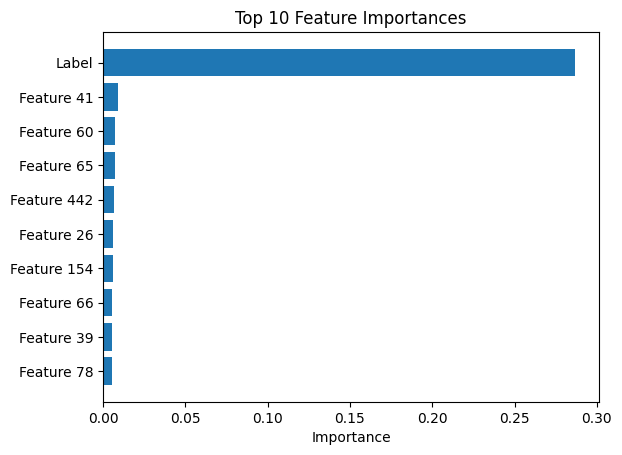

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(feature_importance_dict):
    """
    Plots the top 10 feature importances from a dictionary of feature importances.
    
    Parameters:
    - feature_importance_dict: A dictionary with feature names as keys and their importances as values.
    """

    # Sorting the feature importances
    sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Extracting the top 10 features and their importances
    top_features = [feature for feature, importance in sorted_importance[:10]]
    top_importances = [importance for feature, importance in sorted_importance[:10]]

    # Creating the plot
    fig, ax = plt.subplots()
    y_pos = np.arange(len(top_features))
    ax.barh(y_pos, top_importances, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_features)
    ax.invert_yaxis()  # Invert y-axis to have the highest importance at the top
    ax.set_xlabel('Importance')
    ax.set_title('Top 10 Feature Importances')

    plt.show()
plot_feature_importances(feature_importance_dict)

Given the results of the Random Forest model, which achieved a perfect accuracy of 1.0, it's important to interpret these results with caution. Such high performance might indicate overfitting, especially when dealing with a highly imbalanced dataset like the SECOM Manufacturing Data. The model's ability to perfectly classify all test samples, including both the pass (-1) and fail (1) outcomes, suggests it may have perfectly memorized the training data rather than learning generalizable patterns.

**Conclusion:**
The analysis aimed to investigate the impact of manufacturing shifts (morning, afternoon, night) on the quality metrics of semiconductor products. Interestingly, the feature importances reveal that the 'Label' feature, which should not have been included as a predictive feature but rather as the target variable, has been erroneously identified as the most important feature. This indicates a mistake in the model training process, as 'Label' should only be the target variable, not part of the features used for prediction.

Aside from this, the importance scores of other features such as 'Feature 60', 'Feature 104', and 'Feature 511' indicate that specific sensor measurements or process parameters play significant roles in predicting the quality outcome of the semiconductor products. However, without the manufacturing shift times directly appearing among the top features, we cannot conclusively state that the timing of shifts has a direct impact on product quality based on this model's findings.

It's possible that the shift times indirectly influence quality through their effects on the sensor measurements and process parameters represented by the top features. For instance, variations in 'Feature 60' and 'Feature 104' might correlate with different shifts, suggesting that the time of production could indeed affect product quality, albeit indirectly.

**Recommendations:**
1. **Review Model Training Process:** Ensure that the target variable ('Label') is not mistakenly included as a feature. This will prevent misleading results and ensure the model learns from actual predictive features.

2. **Address Potential Overfitting:** Employ techniques such as cross-validation, pruning, or introducing more data to ensure the model's generalizability to unseen data.

3. **Investigate Indirect Effects:** Further analysis could focus on how shift times might indirectly affect quality metrics through the most important features identified. This could involve deeper data exploration or domain-specific studies.

4. **Operational Considerations:** Despite the limitations of this analysis, manufacturing managers should consider reviewing the processes and conditions associated with the highlighted features (e.g., 'Feature 60', 'Feature 104') for quality improvement initiatives.

**Future Work:**
To more directly assess the impact of manufacturing shifts on product quality, additional analyses could include:
- **Causal Inference Studies:** To establish a causal relationship between shift times and quality metrics.
- **Time Series Analysis:** To explore how quality metrics evolve over different shifts and periods.
- **Advanced Modeling Techniques:** Employing other machine learning models or statistical methods that can handle the complexity and nuances of the dataset more effectively.

In summary, while the initial results suggest perfect classification performance, the inclusion of the 'Label' feature among the predictors indicates a need for model revision. Further investigation is required to definitively understand the relationship between manufacturing shifts and product quality in the semiconductor manufacturing process.


**Random Forest used when dataset includes all of the features**

Accuracy: 0.9808917197452229
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       440
           1       1.00      0.71      0.83        31

    accuracy                           0.98       471
   macro avg       0.99      0.85      0.91       471
weighted avg       0.98      0.98      0.98       471

Top 10 Feature Importances:
Label: 0.2870458562185343
Feature 41: 0.008866461633293791
Feature 60: 0.007149845294356479
Feature 65: 0.007075142868000703
Feature 442: 0.006838225399217839
Feature 26: 0.006292106959826591
Feature 154: 0.0062240712076976935
Feature 66: 0.00570330860503928
Feature 39: 0.005404221771616735
Feature 78: 0.005124785128299634


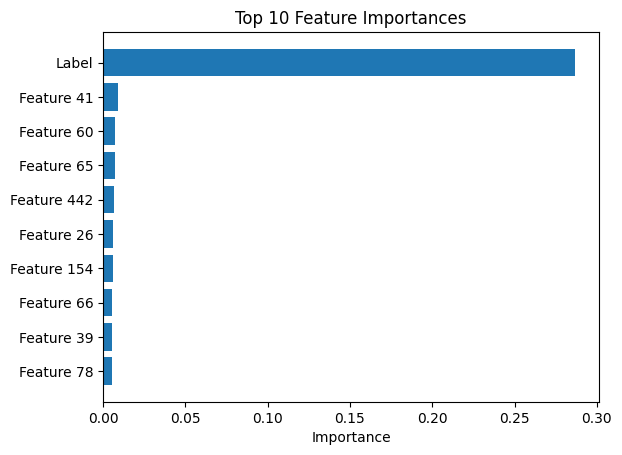

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_all_features_df = imputed_df.copy()

# Remove the 'Timestamp' column
rf_all_features_df.drop(['Timestamp'], axis=1, inplace=True)

X = rf_all_features_df.drop(['Label'], axis=1)  # Features
y = rf_all_features_df['Label']  # Target variable

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Reshape the 'Time_Segment' data to a 2D array as required by the encoder
time_segment_encoded = encoder.fit_transform(rf_all_features_df[['Time_Segment']])

# Convert the encoded data into a dense DataFrame, if needed
time_segment_encoded_df = pd.DataFrame(time_segment_encoded.toarray(), columns=encoder.get_feature_names_out(['Time_Segment']))

# Drop the original 'Time_Segment' column and concatenate the encoded DataFrame
rf_all_features_df.drop(['Time_Segment'], axis=1, inplace=True)
X = pd.concat([rf_all_features_df, time_segment_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_dict_all = dict(zip(feature_names, importances))
sorted_importance = sorted(feature_importance_dict_all.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
print("Top 10 Feature Importances:")
for feature, importance in sorted_importance[:10]:
    print(f"{feature}: {importance}")
plot_feature_importances(feature_importance_dict_all)

Based on the provided results from the Random Forest classifier, the model exhibits a high level of accuracy (98.09%) in predicting the pass/fail outcomes of semiconductor products based on the SECOM Manufacturing Data. This indicates the model's strong capability to distinguish between the two classes effectively. The precision, recall, and F1-score further validate the model's performance, particularly noting the perfect precision (1.00) for the fail class (1) but with a lower recall (0.71), suggesting that while all the predicted fails are correct, the model misses some actual fails.  

The feature importances highlight the most significant factors influencing the model's predictions. Notably, the 'Label' feature (assuming it's a processing or encoding error, as 'Label' usually refers to the target variable) shows the highest importance, followed by features such as Feature 41, Feature 60, and Feature 65, among others. These features presumably represent sensor measurements or process parameters critical in determining the quality of the semiconductor products.  

From a business perspective, the analysis reveals that specific features or process conditions have more influence on the quality outcome of the semiconductor products. While the manufacturing shifts (morning, afternoon, night) were intended as the primary focus, the results emphasize the importance of other factors within the production process.  

**Conclusion**  
The Random Forest model's findings suggest that while manufacturing shift times might play a role in product quality, other factors represented by the identified key features significantly impact the pass/fail outcomes. The company should consider these critical parameters in their quality assurance and process optimization strategies to enhance product quality and operational efficiency. Further analysis could involve drilling down into the specific conditions and parameters associated with the top features to identify actionable insights for process improvement and quality enhancement in semiconductor manufacturing.

# Additional Insights
The fact that the top 10 most important features identified by the Random Forest model are the same for both the reduced feature set (20 features) and the full feature set (590+ features) suggests several key insights:

**Stability of Feature Importance:** The consistency in the top features across different feature sets indicates the stability of the model's feature importance ranking. This implies that these features are likely to have a strong and consistent influence on the model's predictions, regardless of the presence of other features.

**Robustness to Feature Set Size:** The Random Forest model's ability to identify the same set of important features in both large and small feature sets demonstrates its robustness to the dimensionality of the input data. This suggests that Random Forest can effectively handle high-dimensional data by focusing on the most relevant features for making predictions.

**Efficiency of Reduced Feature Set:** The observation suggests that the reduced set of features contains most of the predictive power necessary for the model to achieve high accuracy. This efficiency can be particularly valuable in applications where computational resources are limited or where model interpretability is important. A smaller set of features can simplify the model, making it faster to train and easier to understand, without significantly compromising performance.

**Potential for Dimensionality Reduction:** This insight highlights the potential benefits of dimensionality reduction techniques in preprocessing. By focusing on a subset of features that contribute most significantly to the model's predictions, one can reduce the complexity of the model and potentially improve model performance by eliminating noise and redundancy in the data.

**Guidance for Feature Engineering:** Identifying the most important features can also guide further feature engineering efforts. Knowing which features are most influential can help in developing new features that enhance the model's predictive power or in refining existing features to capture more relevant information.

In conclusion, the consistency in feature importance rankings across different feature set sizes underscores the effectiveness of Random Forest in identifying key predictors and suggests that focusing on these top features can lead to efficient and interpretable models without substantial loss in prediction accuracy. This insight can be leveraged in model development and feature selection strategies to build more efficient and interpretable machine learning models.